In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing dataset from sklearn for clustering

In [5]:
from sklearn.datasets import make_blobs

In [6]:
# Creating Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [7]:
d = {'a' : [data[0] ], 'b' : [data[1]]}

In [8]:
df = pd.DataFrame(d)

####  Visualizing Original Data

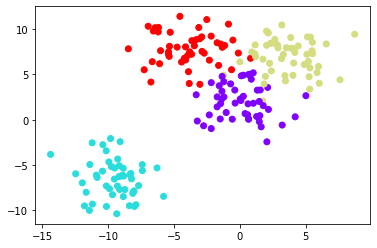

In [10]:
plt.scatter(data[0][:,0] , data[0][:,1] , c = data[1] , cmap = 'rainbow')

In [11]:
# it seems to be there are 4 clusters in our data

#### Lets apply kmeans and we will use elbow method to find best k value for determining clusters
###### lets start witk k=2 i.e 2 clusters

In [12]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans(n_clusters = 2)#giving k=2 (2 clusters we want to form)

In [15]:
k_means.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
k_means.cluster_centers_ # x and y coordinates of our cluster centers

array([[-9.46941837, -6.56081545],
       [-0.0336134 ,  5.54542558]])

In [18]:
label = k_means.labels_

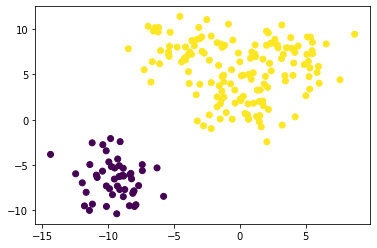

In [20]:
plt.scatter(data[0][:,0] ,data[0][:,1] , c = label ) # our model predict two clusters as shown

In [21]:
#now lets find best k value (i.e respective clusters in dataset)

In [22]:
error=[]
for k in range (1,11):
    k_means  = KMeans(n_clusters = k)
    k_means.fit(data[0])
    error.append(k_means.inertia_)
    
    

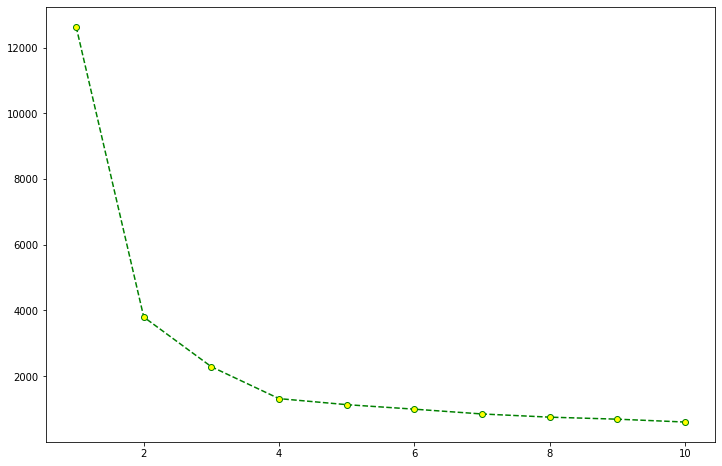

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11) , error , c='green' , linestyle = '--' , marker = 'o' , markerfacecolor = 'yellow')

In [24]:
#so k=4 is optimized value it is the elbow point

In [25]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data[0])
label = k_means.labels_


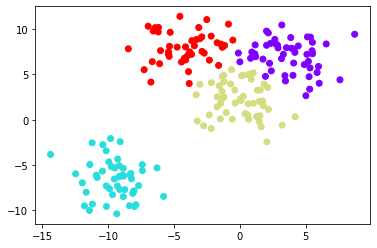

In [26]:
plt.scatter(data[0][:,0] , data[0][:,1] , c = label , cmap = 'rainbow')

In [30]:
k_means.cluster_centers_ # these are the four clusters coordinates

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])